# My first notebook in VS Code!

If matplotlib.pyplot wasn't found try
```bash
pip3 install matplotlib
```

In [3]:
import matplotlib.pyplot as plt

import numpy as np

In [4]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

assert(train_data[0][0:4] == [1, 14, 22, 16])     # Check the first four number 
assert(train_data[0][-2:]  == [178, 32])          # Check the last two numbers

print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# print(reverse_word_index)

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# print(decoded_review)


9999


In [5]:

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Listing 4.4 Model definition

In [8]:
import tensorflow as tf

from tensorflow import keras
from keras import layers

print("Tensorflow version: " + tf.__version__)


model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="relu")
])

model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)


Tensorflow version: 2.10.0


2023-03-09 16:24:53.601073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# Fitting and obtaining a history object
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6758 - accuracy: 0.6850 - val_loss: 0.4656 - val_accuracy: 0.8271
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3394 - accuracy: 0.8761 - val_loss: 0.3977 - val_accuracy: 0.8672
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2388 - accuracy: 0.9203 - val_loss: 0.3948 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1828 - accuracy: 0.9411 - val_loss: 0.4469 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1430 - accuracy: 0.9573 - val_loss: 0.5397 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1116 - accuracy: 0.9693 - val_loss: 0.6405 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0912 - accuracy: 0.9790 - val_loss: 0.7206 - val_accuracy: 0.8808
Epoch 8/20
30

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Listing 4.8 Plotting the training and validation loss

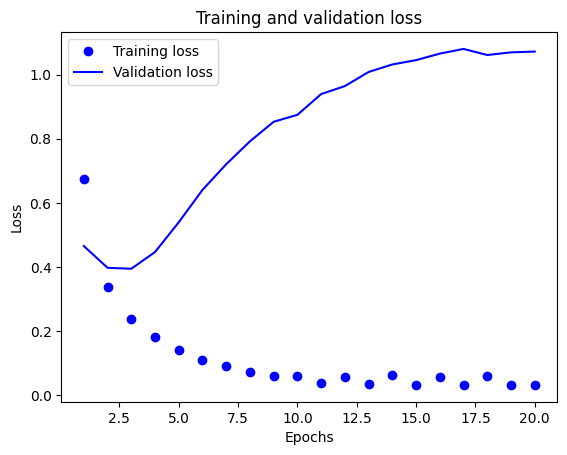

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Listing 4.9 Plotting the training and validation accuracy

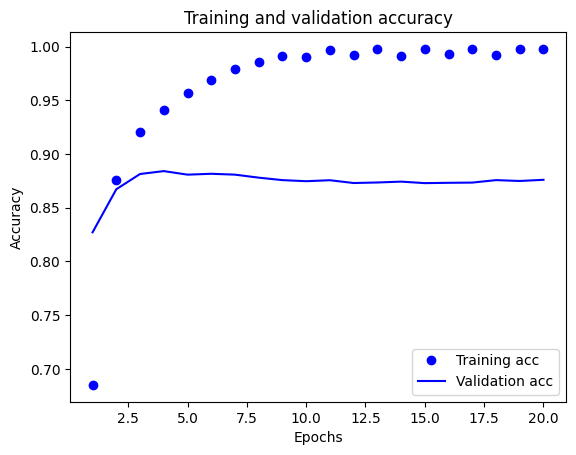

In [13]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Listing 4.10 Retraining a model from scratch

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4721 - accuracy: 0.8180
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2670 - accuracy: 0.9060
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2023 - accuracy: 0.9266
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3053 - accuracy: 0.8792


Final results for test loss & test accuracy

In [15]:
results

[0.3053095042705536, 0.8792399764060974]

In [16]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.19232084],
       [0.999484  ],
       [0.70889914],
       ...,
       [0.09978604],
       [0.05012936],
       [0.37915403]], dtype=float32)

### Summary
* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
* Stacks of Dense layers with <strong>relu</strong> activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
* In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.
* With such a scalar <strong>sigmoid</strong> output on a binary classification problem, the loss function you should use is <strong>binary_crossentropy</strong>.
* The <strong>rmsprop</strong> optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.